In [517]:
import pandas as pd
residual=pd.read_csv('UNdata_Export_20191020_054836874.csv',encoding='latin-1')

life=pd.read_csv('SYB62_T03_201907_Population Growth, Fertility and Mortality Indicators.csv',encoding='latin-1')
life=life[life['Unnamed: 3']=='Infant mortality for both sexes (per 1,000 live births)']

economic=pd.read_csv('SYB62_T13_201904_GDP and GDP Per Capita.csv',encoding='latin-1')
economic=economic[economic['Unnamed: 3']=='GDP real rates of growth (percent)']

tech=pd.read_csv('SYB62_T29_201904_Internet Usage.csv',encoding='latin-1')

crime=pd.read_csv('SYB62_T12_201904_Intentional homicides and Other Crimes.csv',encoding='latin-1')
crime=crime[crime['Unnamed: 3']=='Intentional homicide rates per 100,000']

In [518]:
lac=['Argentina',
'Bolivia',
'Brazil',
'Chile',
'Colombia',
'Ecuador',
'French Guiana',
'Guyana',
'Paraguay',
'Peru',
'Suriname',
'Uruguay',
'Venezuela',
'Belize',
'Costa Rica',
'El Salvador',
'Guatemala',
'Honduras',
'Mexico',
'Nicaragua',
'Panama',
'Antigua & Barbuda',
'Aruba',
'Bahamas',
'Barbados',
'Cayman Islands',
'Cuba',
'Dominica',
'Dominican Republic',
'Grenada',
'Guadeloupe',
'Haiti',
'Jamaica',
'Martinique',
'Puerto Rico',
'Saint Barthelemy',
'Saint Kitts and Nevivs',
'Saint Lucia',
'Saint Vincent & Grenadines',
'Trinidad and Tobago',
'Turks and Caicos Islands',
'Virgin Islands']

la=['Argentina',
'Bolivia (Plurin. State of)',
'Brazil',
'Chile',
'Colombia',
'Ecuador',
'French Guiana',
'Guyana',
'Paraguay',
'Peru',
'Suriname',
'Uruguay',
'Venezuela (Boliv. Rep. of)']
anios=['2011','2012','2013','2014','2015']

In [519]:
residual=residual.iloc[:,[0,2,5]]
residual=residual[residual.iloc[:,0].isin(la)]
residual.rename(columns={'Country or Area':'country','Year':'anio','Value':'value'}, inplace=True)

life=life.iloc[2:,[1,2,4]]
life=life[life.iloc[:,0].isin(la)]
life=life[life.iloc[:,1].isin(anios)]
life.rename(columns={'Population growth and indicators of fertility and mortality':'country','Unnamed: 2':'anio','Unnamed: 4':'value'}, inplace=True)

economic=economic.iloc[2:,[1,2,4]]
economic=economic[economic.iloc[:,0].isin(la)]
economic=economic[economic.iloc[:,1].isin(anios)]
economic.rename(columns={'Gross domestic product and gross domestic product per capita':'country','Unnamed: 2':'anio','Unnamed: 4':'value'}, inplace=True)

tech=tech.iloc[2:,[1,2,4]]
tech=tech[tech.iloc[:,0].isin(la)]
tech=tech[tech.iloc[:,1].isin(anios)]
tech.rename(columns={'Internet Usage':'country','Unnamed: 2':'anio','Unnamed: 4':'value'}, inplace=True)

crime=crime.iloc[2:,[1,2,4]]
crime=crime[crime.iloc[:,0].isin(la)]
crime=crime[crime.iloc[:,1].isin(anios)]
crime.rename(columns={'Intentional homicides and other crimes':'country','Unnamed: 2':'anio','Unnamed: 4':'value'}, inplace=True)

In [520]:
life=life.pivot(index='country',columns='anio',values='value').iloc[:,0].fillna(0)
economic=economic.pivot(index='country',columns='anio',values='value').iloc[:,0].fillna(0)
tech=tech.pivot(index='country',columns='anio',values='value').iloc[:,1].fillna(0)
crime=crime.pivot(index='country',columns='anio',values='value').iloc[:,3].fillna(0)

In [521]:
f1,f2,f3,f4,f5=[0]*13,[0]*13,[0]*13,[0]*13,[0]*13

In [522]:
for ind,row in residual.iterrows():
    f1[la.index(row['country'])]=row['value']
for row in life.iteritems():
    f2[la.index(row[0])]=row[1]
for row in economic.iteritems():
    f3[la.index(row[0])]=row[1]
for row in tech.iteritems():
    f4[la.index(row[0])]=row[1]
for row in crime.iteritems():
    f5[la.index(row[0])]=row[1]

In [523]:
data={'residual':f1,'life':f2,'economic':f3,'tech':f4,'crime':f5}
df=pd.DataFrame(data,index=la)
df

,residual,life,economic,tech,crime
Argentina,8.0,12.0560,2.7,68.0,6.5
Bolivia (Plurin. State of),7.0,32.3990,4.9,35.6,0
Brazil,49.0,15.7930,-3.8,58.3,28.4
Chile,6.0,7.1970,2.3,76.6,3.0
Colombia,13.0,14.4380,3.1,55.9,26.5
Ecuador,5.0,15.0730,0.1,48.9,0
French Guiana,0.0,9.1190,0,0,0
Guyana,11.0,31.6550,3.1,34.0,19.4
Paraguay,10.0,20.7790,3.0,49.7,9.3
Peru,10.0,14.0870,3.3,40.9,7.2


In [524]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
features = ['residual','life','economic','tech','crime']
# Separating out the features
x=df.loc[:,features]
x = x.values
# Standardizing the features
mean_of_array = df.mean(axis=1)
std_of_array = df.std(axis=1)
scaler=RobustScaler()
x = scaler.fit_transform(x)

In [525]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2','pc3'])

In [526]:
principalDf

,pc1,pc2,pc3
0,-1.065257,-0.239518,1.186487
1,-1.794346,0.763989,-1.610057
2,4.645517,1.165496,0.477432
3,-1.235785,-0.889175,1.747463
4,-0.309153,1.626967,1.198805
5,-1.322760,-0.961620,-0.001910
6,-2.218562,-1.336230,-1.439865
7,-0.811282,2.073923,-1.027828
8,-0.963760,0.575410,-0.039933
9,-1.096664,0.054325,-0.011204


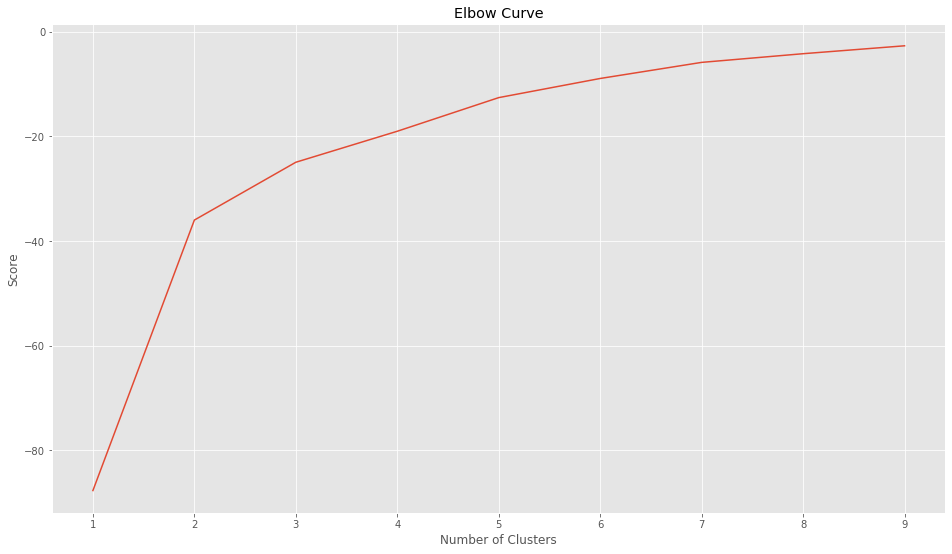

In [527]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

X = np.array(principalDf[["pc1","pc2","pc3"]])
Nc = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [528]:
kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[-1.60806356  0.50056062 -1.35925023]
 [ 3.60003175 -0.40151475 -0.36204221]
 [-0.85370065 -0.04244823  0.73769676]]


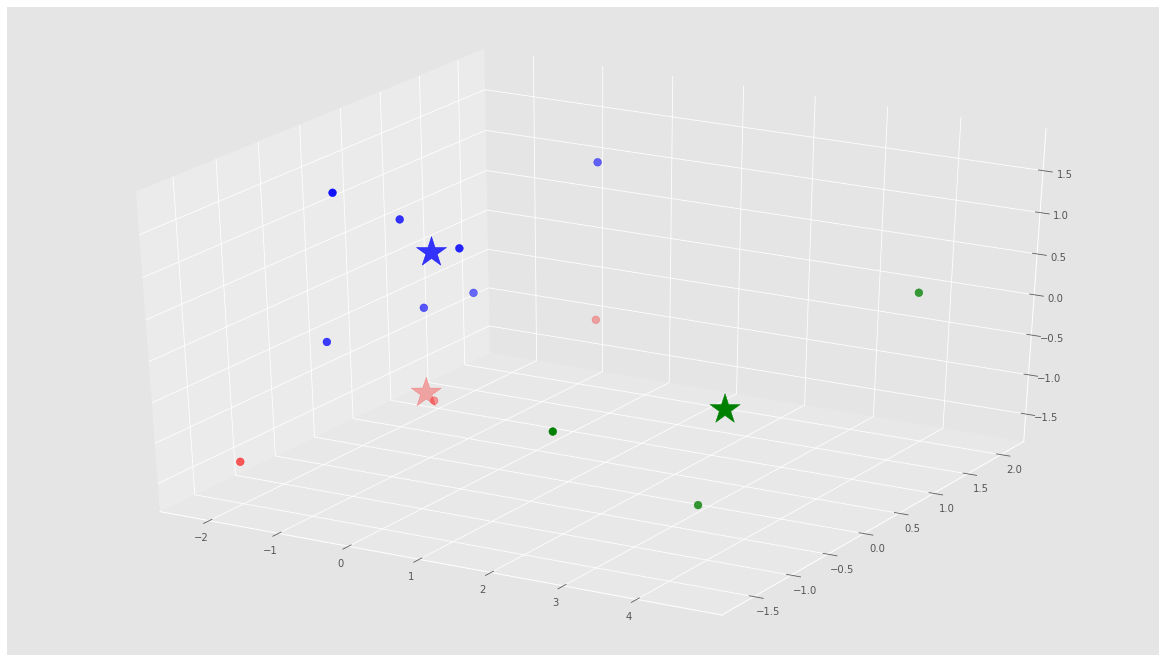

In [529]:
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
#C=pca.inverse_transform(C)
colores=['red','green','blue']
asignar=[]
for row in labels:
    asignar.append(colores[row])

#X=pca.inverse_transform(principalComponents)

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

In [530]:
lb=set(labels)
for i in lb:
    print('Clase '+str(i))
    for ind,j in enumerate(labels):
        if j==i:
            print(la[ind])
    print(' ')

Clase 0
Bolivia (Plurin. State of)
French Guiana
Guyana
 
Clase 1
Brazil
Suriname
Venezuela (Boliv. Rep. of)
 
Clase 2
Argentina
Chile
Colombia
Ecuador
Paraguay
Peru
Uruguay
 


In [533]:
vul=[0]*13
X=scaler.inverse_transform(x)
for ind,row in principalDf.iterrows():
#     c1=centroids[labels[ind]][0]
#     c2=centroids[labels[ind]][1]
#     c3=centroids[labels[ind]][2]
#     dc=(c1**2+c2**2+c3**2)**0.5
    #vul[ind]=(((row['pc1']-c1)**2+(row['pc2']-c2)**2+(row['pc3']-c3)**2)**0.5)
    vec=X[ind]
    #vul[ind]=0.50*vec[0]+0.75*vec[1]+vec[2]+0.50*vec[3]+0.25*vec[4]
    vul[ind]=vec[0]+vec[1]+vec[2]+vec[3]+vec[4]
    #vul[ind]=np.mean(X[ind]**2)1

In [550]:
np.array(vul)/100

array([0.97256, 0.79899, 1.47693, 0.95097, 1.12938, 0.69073, 0.09119,
       0.99155, 0.92779, 0.75487, 1.06461, 0.98549, 1.00807])